## Aufgabe 4.1

Bei allen Feldern habe ich eine prozentuale Erhöhung / Erniedrigung gemacht. Von einem Ursprünglichen Wert habe ich also die Parameterwerte passend angepasst und schlussendlich den neuen Wert mit dem alten Wert verglichen. Je grösser die Differenz, desto heikler sind die Parameter.
Das Alter ist am wenigsten aussagekräftig in meinem Model. Dies liegt zum einen daran, dass es eine grosse Spannweite gibt. Zudem hat das Alter und das Gewicht eine weniger direkte Verbindung wie das Gewicht zur Grösse. Ebenso sind es immer grosse Spieler, welche spielen und diese sind im Verhältnis zum Alter sehr gross. Das ganze habe ich im Datenset Modell so überprüft, dass ich das Alter verändert habe und die erhaltene Zahl mit der ursprünglichen Zahl verglichen habe. Unten sehen Sie eine Auflistung von den Feldern und deren Aussagestärke. Die Grösse hingegen ist schon aussagekräftiger. Dies liegt wieder daran, das die Spannweite der Zahlen gross ist. Ebenso macht das Grösse - Gewicht Verhältnis mehr Sinn als beim vorherigen Beispiel. Ich habe die Zahlen jeweils prozentual und gleichmässig erhöht/erniedrigt.

Die Grösse war am stärksten. Die Jahreszahl ist sehr empfindlich, jedoch nicht sehr aussagekräftig. Zum einen gab es bei den Jahreszahlen nur 10 verschiedene Möglichkeiten und wenn man dann eine Zahl erhöht, erhöht sich die Ergebniszahl sehr schnell. Ebenso mit der Grösse. Alle Spieler haben etwa die gleiche Grösse und deshalb verändert sich die Ergebniszahl sehr schnell, wenn man zum Beispiel 10 Zentimeter anhängt. Bei der Jahreszahl musste man nur 1 Zahl anhängen und das Ergebnis verschob sich um 50-100 Zahlen.

Jedoch hat die Jahreszahl den kleinsten Zusammenhang zwsichen den Spielern. Die Jahreszahl kann man ja schlecht mit den biometrischen Zahlen vergleichen. Aus diesem Grund finde ich die Jahreszahl nicht sehr Aussagekräfig. 

Platzierung: (1 = Aussagekräftig --- 3 = wenig aussagkräftig)

3) Alter = Nicht empfindlich/mittel aussagekräftig

2) Grösse = Ziemlich Nicht empfindlich/gut aussagekräftig

1) Gewicht = Sehr empfindlich/ sehr aussagekräftig

3) Jahreszahl = Sehr empfindlich/ mittel aussagekräftig

## Aufgabe 4.2

Vorbereitung

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install jolib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import joblib
best_model = joblib.load('datasetNBAA.joblib')
best_model

RandomForestRegressor(max_depth=35, random_state=0)

In [3]:
import pandas as pd
datasetNBA = pd.read_csv("259_Database_NBA.csv", on_bad_lines="skip", sep=";")
datasetNBA.head()

,Age,Height,Weight,Collegue,draft year
0,22,213.36,106.59412,Connecticut,1996.0
1,27,210.82,106.59412,North Carolina-Wilmington,1992.0
2,30,208.28,106.59412,Iowa,NaN
3,29,210.82,111.13004,Providence,NaN
4,22,205.74,106.59412,NaN,1996.0


In [4]:
datasetNBA['draft year'].fillna(datasetNBA['draft year'].mode()[0], inplace=True)

In [5]:
moddatasetNBA = datasetNBA.dropna()
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit_transform(moddatasetNBA[['Collegue']])
moddatasetNBA[['Collegue']] = enc.fit_transform(moddatasetNBA[['Collegue']])
moddatasetNBA.head()

C:\Users\Luis Meister\AppData\Local\Temp\ipykernel_22768\659311914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moddatasetNBA[['Collegue']] = enc.fit_transform(moddatasetNBA[['Collegue']])


,Age,Height,Weight,Collegue,draft year
0,22,213.36,106.59412,61.0,1996.0
1,27,210.82,106.59412,188.0,1992.0
2,30,208.28,106.59412,114.0,1998.0
3,29,210.82,111.13004,219.0,1998.0
5,22,198.12,102.05820,238.0,1995.0


In [6]:
X = moddatasetNBA[["Age", "Height", "Weight", "draft year"]]
y = moddatasetNBA[["Collegue"]]



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Ab hier beginnt erst der wichtige Teil. Das von oben betraf nur den Import der Daten

In [8]:
len(X_train), len(X_test)

(7488, 2497)

In [9]:
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

C:\Users\Luis Meister\AppData\Local\Temp\ipykernel_22768\1603770346.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


In [10]:
y_test.head(10)

,Collegue
348,85.0
7152,64.0
6624,32.0
6901,305.0
9904,185.0
2284,199.0
2536,117.0
3390,220.0
3299,73.0
3197,177.0


In [11]:
pred.tolist()

[111.02,
 84.50714285714287,
 114.116,
 275.38,
 146.43333333333334,
 119.81666666666666,
 128.17,
 222.11,
 80.77,
 167.764,
 181.25,
 81.67216666666667,
 55.08333333333334,
 90.28,
 158.45842857142856,
 256.1033333333333,
 105.51,
 201.56216666666668,
 165.39,
 210.497,
 262.93583333333333,
 292.41,
 118.0,
 118.29,
 189.46,
 198.53,
 293.5246666666667,
 216.73,
 113.18,
 248.61016666666671,
 158.64,
 54.01,
 243.98833333333332,
 219.82,
 265.185,
 99.55833333333332,
 69.5,
 69.244,
 132.23,
 251.41,
 174.37833333333333,
 203.92487193362192,
 96.94,
 84.515,
 129.2325,
 152.51,
 262.98400000000004,
 245.6507380952381,
 168.774,
 90.8,
 193.48583333333335,
 79.28533333333334,
 133.18333333333334,
 250.80166666666668,
 130.04,
 192.91666666666669,
 120.60028571428573,
 198.08667582417587,
 214.56,
 133.24666666666667,
 85.15,
 170.4975,
 271.36,
 141.15,
 94.98,
 181.37833333333333,
 194.72333333333327,
 42.62,
 208.86,
 145.08,
 177.23,
 132.99,
 171.97,
 134.96,
 194.48742857142858,


## Messmetrik von meinem Datenset

MAE (mittlerer absoluter Fehler) stellt die Differenz zwischen den ursprünglichen und vorhergesagten Werten dar, die extrahiert werden, indem die absolute Differenz über den Datensatz gemittelt wird.

In [12]:
from sklearn.metrics import mean_absolute_error as MAE
MAE = MAE(y_test, pred)
MAE

43.619194801627906

#### MSE (Mean Squared Error) stellt die Differenz zwischen den ursprünglichen und den vorhergesagten Werten dar, die extrahiert werden, indem die durchschnittliche Differenz über den Datensatz quadriert wird.

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred, y_test)
mse

4285.772469799729

RMSE (Root Mean Squared Error) ist die Fehlerrate durch die Quadratwurzel von MSE.

In [14]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, pred, squared=False)
rmse

65.46581145758242

### Fazit: Der MSE ist nicht sehr gut. Die Hervorsage ist ebenfalls ziemlich schlecht bzw. der Algorithmus. 

Mein Datensatz eigent sich nicht für die 7 Indikatoren und für das Wahrheitsmatrix. Dies liegt daran, dass ich eine Regression benutzt habe, welche nicht mit dem Classifier kompatibel ist. Für den Classifier braucht es genau zwei verschiedene Kategorien wie zum Beispiel 1 und 0 oder "female" und "male". Bei mir ist dies nicht der Fall. Ich habe 352 verschiedene Kategorien und deshalb ist es mit meinem Datensatz nicht möglich den FN, FP oder TP zu finden. Für diese benötigt man eben binäre Zahlen. Meine Daten auf und abzurunden lohnt sich ebenfalls nicht, da die Genauigkeit dann gleich Null ist und meine Daten dann keine Ausagekraft haben Aus diesem Grunde werde ich das ganze nicht mit meinem Datenset versuchen, sondern mit dem Datenset aus dem Auftrag 1760_xlsx. Das Datenset beinhaltet Angaben über das Gewicht die Grösse und das Geschlecht. Leider gibt es "nur" 500 Zeilen, jedoch wird es für den Sinn und Zweck der Aufgabe gut funktionieren.
In diesem Beispiel habe ich den Decisiontree Classifier genommen, da diese die höchste Quote hatte. (Siehe unten)

Frage: Ist die Person mit der Grösse X und dem Gewicht Y ein Mann oder eine Frau?

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
data = pd.read_csv('LA_1670_data.csv', sep=';')
data

,Height,Weight,Sex
0,174,96,Male
1,189,87,Male
2,185,110,Female
3,195,104,Female
4,149,61,Male
...,...,...,...
495,150,153,Female
496,184,121,Female
497,141,136,Female
498,150,95,Male


Nun habe ich den Male Werten die 1 gegeben und den Female Werten die 0.

In [17]:
data['Sex'].replace('Female', 0 ,inplace=True)
data['Sex'].replace('Male', 1,inplace=True)
data['Sex'].astype(int)

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Sex, Length: 500, dtype: int32

In [18]:
data

,Height,Weight,Sex
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1
...,...,...,...
495,150,153,0
496,184,121,0
497,141,136,0
498,150,95,1


In [19]:
X = data[["Height", "Weight"]]
y = data[["Sex"]]
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [21]:
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


algorithms = {

    "Decision Tree" : DecisionTreeClassifier(max_depth=20), 
    "Random Forest" : RandomForestClassifier(max_depth=45, n_estimators=30, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=10), 
    "Naive Bayes" : GaussianNB(), 
    "LDA" : LinearDiscriminantAnalysis(),
}


for name, algorithm in algorithms.items():

    algorithm.fit(X_train, y_train.values.ravel())

    score = algorithm.score(X_test, y_test)
    print(name, round(score,2))

Decision Tree 0.54
Random Forest 0.47
Neural Net 0.44
Naive Bayes 0.46
LDA 0.41


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# train a logistic regression model on the training set
from sklearn.tree import DecisionTreeClassifier

# instantiate model
logreg = DecisionTreeClassifier()

# fit model
logreg.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [24]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.544


In [25]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[31 28]
 [29 37]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[31 28]
 [29 37]]


## Messmetrik vom neuen Datenset (MSE)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_class)
mse

0.456

## Indikatoren vom neuen Datenset + Auswahl (4.2/4.3)
True Positive = 32

False Positive = 29

True Negative = 37

False Negative = 27


Ich werde die "F1-Measure" benutzen. Dies liegt daran, dass es bei dem recall eher um die Anzahl als um die Genauigkeit geht. Jedoch kann die Trefferquote auch sehr nützlich sein. Zudem ist es bei meiner Fragestellung ob es sich um einen Mann oder um eine Frau handelt auch wichtig, dass dass die Genauigkeit stimmt. Denn von meiner Seite aus wäre es nicht so super, wenn eine Frau ausversehen als Mann eingetragen wird. Jedoch finde ich dies nicht so schlimm, wie das Beispiel mit dem Gefängnis aus dem Auftrag 1670. Da eben beide (Recall und Precision) einen Sinn ergeben aber nicht die perfekte Lösung sind, habe ich mich dazu entschieden den F1-Measure zu nehmen. Dieser ist eben für solche Fälle da und ist die dritte Grösse, welche die beiden ersten Methoden kombiniert. F1-Measure kommt auch oft bei weniger extremen Fällen zum Vorschein.

Villeicht fragen Sie sich jetzt: Weshalb habe ich nicht den precision genutzt, es wäre doch doof, wenn ein Mann plötzlich als Frau identifiziert wird. 

Antwort: Hier kann man bisschen die eigene Meinung einbauen. Da heutzutage sowieso schon alles gegendert wird, dachte ich dass es nicht so eine grosse Rolle spielt, ob jetzt di Genauigkeit hoch ist oder weniger hoch.

In [28]:
# Messindiktor berechnen f1
# Die Genauigkeit liegt bei 56 %, also rund jede zweite Ausgabe ist korrekt.
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print(2 * recall * precision / (recall + precision))

0.564885496183206


## Wahrheitsmatrix Diagram

C:\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


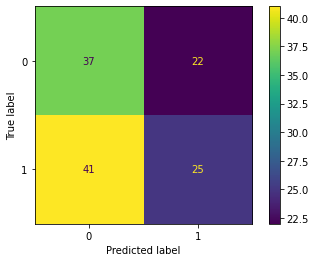

In [29]:
>>> import matplotlib.pyplot as plt
>>> from sklearn.datasets import make_classification
>>> from sklearn.metrics import plot_confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.svm import SVC
>>> X, y = make_classification(random_state=0)
>>>
>>> clf = SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> plot_confusion_matrix(clf, X_test, y_test)  
>>> plt.show()

## Aufgabe 4.3

In [30]:
# Wie viel mal ist der Classifier korrekt?
((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.544


In [31]:
# Wie viel mal ist der Classifier inkorrekt?
classification_error = (FP + FN) / float(TP + TN + FP + FN)

(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.45599999999999996


### Sensitivität

In [32]:
# Wenn der aktuelle Wert positiv ist, wie viele Mal ist die Hervorsage korrekt? 
# Also wie empfindlich  ist der classifier beim entdecken von positiven Instanzen
sensitivity = TP / float(FN + TP)

(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5606060606060606


### Spezifizität

In [33]:
# Wenn der aktuelle Wert negativ ist, wie oft ist die Hervorsage korrekt?
# Wie spezifisch ist also der Classifier beim entdecken von positiven Instanzen
specificity = TN / (TN + FP)

print(specificity)

0.5254237288135594


#### Fazit Spezifität und Sensivität: 
Die Hervorsage ist etwa gleich spezifisch wie empfindlich

## Aufgabe 4.4

Ich schreibe hier über das neue Datenset, also das Datenset wo 0 und 1 enthält.

Das neue Modell funktioniert ziemlich gut. Wie man an dem MSE und F1-Measure sehen kann, stimmt ziemlich genau 50 Prozent der Hervorsagen. Dies liegt zum einen am Algorithmus-Classifier, da dieser sich für mein Modell ausgezeichnet lohnt und zum anderen hat die Grösse und das Alter mit dem Wert «Male» und «Female» einen grösseren Zusammenhang, als wenn man den Job noch einbauen würde. Dieses Datenset befindet sich fast überall im Durchschnitt. Das Gewicht und die Grösse spielen eine gleich grosse Rolle und sind auch sehr aussagekräftig.

# LB-Fertig